<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Canoza, Cherrylyn S.<br>
    201913191 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [9]:
import pandas as pd

In [270]:
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv("bebang prices.csv", index_col=0)
df_sales = pd.read_csv("bebang sales.csv")


df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [13]:
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [274]:
import numpy as np

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0]
Prices_mat = np.array(prices_mat.reshape(12,1))
costs_mat = np.array(df_prices)[1]
Costs_mat = np.array(costs_mat.reshape(12,1))



print(sales_mat.shape)
print(Prices_mat.shape)
print(Costs_mat.shape)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [271]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales_mat * Prices_mat
    monthly_costs = sales_mat * Costs_mat
    monthly_profits = monthly_revenue - monthly_costs
    
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [272]:
month_rev, month_cost, month_profit = monthly_sales(Prices_mat, Costs_mat, sales_mat)

In [103]:
print("Monthly Revenue")
JanRev = month_rev[0::12]
print ('January:', JanRev)
FebRev = month_rev[1::12]
print ('February:', FebRev)
MarRev = month_rev[2::12]
print ('March:', MarRev)
ApRev = month_rev[3::12]
print ('April:', ApRev)
MayRev = month_rev[4::12]
print ('May:', MayRev)
JunRev = month_rev[5::12]
print ('June:', JunRev)
JulRev = month_rev[6::12]
print ('July:', JulRev)
AugRev = month_rev[7::12]
print ('August:', AugRev)
SepRev = month_rev[8::12]
print ('September:', SepRev)
OctRev = month_rev[9::12]
print ('October:', OctRev)
NovRev = month_rev[10::12]
print ('November:', NovRev)
DecRev = month_rev[11::12]
print ('December:', DecRev)

Monthly Revenue
January: [27335  5250 11980  4340 32250  8400 39240 21510 17940 12960 20610 35010]
February: [18340  8100 13480  3920 24900 14880 15200 20790  6090  4920 18540 26370]
March: [12740  8600 17080  3990 44250 14760  6160 15930  1080  1920  3510 29025]
April: [5495  800  280  805 4900 3120  560 2205 2880 1280 3510 4500]
May: [31290  3075  9340  6930  8850  6520  5880  4005 23670  2600  3510 44415]
June: [1960   25 1560  420 4900 1040  600    0  120 2960  315 2835]
July: [3115   75  720 1120 2150 1800 3920   45  150 3120  135 1620]
August: [1435    0  960 1435 4800  880 1320    0    0 1800  360 4005]
September: [ 805   25 1500  805 1300 2160  920   45  240 3560   90 3510]
October: [2730  150 1960 1260 3550 1640 1440  360    0 4000   45 4455]
November: [ 8085  7800 15620 10500 27450  8280 22080 15075 23670 25280 14535 35280]
December: [ 31465  13700  32040  19810  44850  18240  25320   9630  13740   9240
  25380 103950]


In [105]:
print("Monthly Cost")
JanCost = month_cost[0::12]
print ('January:', JanCost)
FebCost = month_cost[1::12]
print ('February:', FebCost)
MarCost = month_cost[2::12]
print ('March:', MarCost)
ApCost = month_cost[3::12]
print ('April:', ApCost)
MayCost = month_cost[4::12]
print ('May:', MayCost)
JunCost = month_cost[5::12]
print ('June:', JunCost)
JulCost = month_cost[6::12]
print ('July:', JulCost)
AugCost = month_cost[7::12]
print ('August:', AugCost)
SepCost = month_cost[8::12]
print ('September:', SepCost)
OctCost = month_cost[9::12]
print ('October:', OctCost)
NovCost = month_cost[10::12]
print ('November:', NovCost)
DecCost = month_cost[11::12]
print ('December:', DecCost)

Monthly Cost
January: [19525  3150  5990  2480 22575  6510 29430 11950  8970  8100 14656 24118]
February: [13100  4860  6740  2240 17430 11532 11400 11550  3045  3075 13184 18166]
March: [ 9100  5160  8540  2280 30975 11439  4620  8850   540  1200  2496 19995]
April: [3925  480  140  460 3430 2418  420 1225 1440  800 2496 3100]
May: [22350  1845  4670  3960  6195  5053  4410  2225 11835  1625  2496 30597]
June: [1400   15  780  240 3430  806  450    0   60 1850  224 1953]
July: [2225   45  360  640 1505 1395 2940   25   75 1950   96 1116]
August: [1025    0  480  820 3360  682  990    0    0 1125  256 2759]
September: [ 575   15  750  460  910 1674  690   25  120 2225   64 2418]
October: [1950   90  980  720 2485 1271 1080  200    0 2500   32 3069]
November: [ 5775  4680  7810  6000 19215  6417 16560  8375 11835 15800 10336 24304]
December: [22475  8220 16020 11320 31395 14136 18990  5350  6870  5775 18048 71610]


In [108]:
print("Monthly Profits")
JanProfits = month_profit[0::12]
print ('January:', JanProfits)
FebProfits = month_profit[1::12]
print ('February:', FebProfits)
MarProfits = month_profit[2::12]
print ('March:', MarProfits)
ApProfits = month_profit[3::12]
print ('April:', ApProfits)
MayProfits = month_profit[4::12]
print ('May:', MayProfits)
JunProfits = month_profit[5::12]
print ('June:', JunProfits)
JulProfits = month_profit[6::12]
print ('July:', JulProfits)
AugProfits = month_profit[7::12]
print ('August:', AugProfits)
SepProfits = month_profit[8::12]
print ('September:', SepProfits)
OctProfits = month_profit[9::12]
print ('October:', OctProfits)
NovProfits = month_profit[10::12]
print ('November:', NovProfits)
DecProfits = month_profit[11::12]
print ('December:', DecProfits)

Monthly Profits
January: [ 7810  2100  5990  1860  9675  1890  9810  9560  8970  4860  5954 10892]
February: [5240 3240 6740 1680 7470 3348 3800 9240 3045 1845 5356 8204]
March: [ 3640  3440  8540  1710 13275  3321  1540  7080   540   720  1014  9030]
April: [1570  320  140  345 1470  702  140  980 1440  480 1014 1400]
May: [ 8940  1230  4670  2970  2655  1467  1470  1780 11835   975  1014 13818]
June: [ 560   10  780  180 1470  234  150    0   60 1110   91  882]
July: [ 890   30  360  480  645  405  980   20   75 1170   39  504]
August: [ 410    0  480  615 1440  198  330    0    0  675  104 1246]
September: [ 230   10  750  345  390  486  230   20  120 1335   26 1092]
October: [ 780   60  980  540 1065  369  360  160    0 1500   13 1386]
November: [ 2310  3120  7810  4500  8235  1863  5520  6700 11835  9480  4199 10976]
December: [ 8990  5480 16020  8490 13455  4104  6330  4280  6870  3465  7332 32340]


In [277]:
print ('January Profit: ', sum(JanProfits), 'PHP')
print ('February Profit: ', sum(FebProfits), 'PHP')
print ('March Profit: ', sum(MarProfits), 'PHP')
print ('April Profit: ', sum(ApProfits), 'PHP')
print ('May Profit: ', sum(MayProfits), 'PHP')
print ('June Profit: ', sum(JunProfits), 'PHP')
print ('July Profit: ', sum(JulProfits), 'PHP')
print ('August Profit: ', sum(AugProfits), 'PHP')
print ('September Profit: ', sum(SepProfits), 'PHP')
print ('October Profit: ', sum(OctProfits), 'PHP')
print ('November Profit: ', sum(NovProfits), 'PHP')
print ('December Profit: ', sum(DecProfits), 'PHP')

January Profit:  32380 PHP
February Profit:  24570 PHP
March Profit:  19330 PHP
April Profit:  15690 PHP
May Profit:  14120 PHP
June Profit:  5180 PHP
July Profit:  4620 PHP
August Profit:  3730 PHP
September Profit:  3320 PHP
October Profit:  3090 PHP
November Profit:  2310 PHP
December Profit:  0 PHP


## Part 2: Flavor Sales

In [275]:
def flavor_sales(price, cost, sales):
    flavor_revenue = sales_mat * Prices_mat
    flavor_costs = sales_mat * Costs_mat
    flavor_profits = flavor_revenue - flavor_costs
    
    return flavor_profits.flatten()

In [276]:
flavor_profit = flavor_sales(Prices_mat, Costs_mat, sales_mat)

In [278]:
print("Flavor Profits")
JanProfits = flavor_profit[0::12]
print ('January:', JanProfits)
FebProfits = flavor_profit[1::12]
print ('February:', FebProfits)
MarProfits = flavor_profit[2::12]
print ('March:', MarProfits)
ApProfits = flavor_profit[3::12]
print ('April:', ApProfits)
MayProfits = flavor_profit[4::12]
print ('May:', MayProfits)
JunProfits = flavor_profit[5::12]
print ('June:', JunProfits)
JulProfits = flavor_profit[6::12]
print ('July:', JulProfits)
AugProfits = flavor_profit[7::12]
print ('August:', AugProfits)
SepProfits = flavor_profit[8::12]
print ('September:', SepProfits)
OctProfits = flavor_profit[9::12]
print ('October:', OctProfits)
NovProfits = flavor_profit[10::12]
print ('November:', NovProfits)
DecProfits = flavor_profit[11::12]
print ('December:', DecProfits)

Flavor Profits
January: [ 7810  2100  5990  1860  9675  1890  9810  9560  8970  4860  5954 10892]
February: [5240 3240 6740 1680 7470 3348 3800 9240 3045 1845 5356 8204]
March: [ 3640  3440  8540  1710 13275  3321  1540  7080   540   720  1014  9030]
April: [1570  320  140  345 1470  702  140  980 1440  480 1014 1400]
May: [ 8940  1230  4670  2970  2655  1467  1470  1780 11835   975  1014 13818]
June: [ 560   10  780  180 1470  234  150    0   60 1110   91  882]
July: [ 890   30  360  480  645  405  980   20   75 1170   39  504]
August: [ 410    0  480  615 1440  198  330    0    0  675  104 1246]
September: [ 230   10  750  345  390  486  230   20  120 1335   26 1092]
October: [ 780   60  980  540 1065  369  360  160    0 1500   13 1386]
November: [ 2310  3120  7810  4500  8235  1863  5520  6700 11835  9480  4199 10976]
December: [ 8990  5480 16020  8490 13455  4104  6330  4280  6870  3465  7332 32340]


In [146]:
RVProfits = flavor_profit[0:12]
print ('Red Velvet:', RVProfits)
OreoProfits = flavor_profit[12:24]
print ('Oreo:', OreoProfits)
SGProfits = flavor_profit[24:36]
print ('Sugar Glazed:', SGProfits)
AHProfits = flavor_profit[36:48]
print ('Almond Honey:', AHProfits)
MatchaProfits = flavor_profit[48:60]
print ('Matcha:', MatchaProfits)
SCProfits = flavor_profit[60:72]
print ('Strawberry Cream:', SCProfits)
BSBProfits = flavor_profit[72:84]
print ('Brown Sugar Boba:', BSBProfits)
FNProfits = flavor_profit[84:96]
print ('Fruits and Nuts:', FNProfits)
DCProfits = flavor_profit[96:108]
print ('Dark Chocolate:', DCProfits)
COProfits = flavor_profit[108:120]
print ('Chocolate and Orange:', COProfits)
CMProfits = flavor_profit[120:132]
print ('Chocolate Mint:', CMProfits)
CBNProfits = flavor_profit[132:144]
print ('Choco Butter Naught:', CBNProfits)

Red Velvet: [7810 5240 3640 1570 8940  560  890  410  230  780 2310 8990]
Oreo: [2100 3240 3440  320 1230   10   30    0   10   60 3120 5480]
Sugar Glazed: [ 5990  6740  8540   140  4670   780   360   480   750   980  7810 16020]
Almond Honey: [1860 1680 1710  345 2970  180  480  615  345  540 4500 8490]
Matcha: [ 9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455]
Strawberry Cream: [1890 3348 3321  702 1467  234  405  198  486  369 1863 4104]
Brown Sugar Boba: [9810 3800 1540  140 1470  150  980  330  230  360 5520 6330]
Fruits and Nuts: [9560 9240 7080  980 1780    0   20    0   20  160 6700 4280]
Dark Chocolate: [ 8970  3045   540  1440 11835    60    75     0   120     0 11835  6870]
Chocolate and Orange: [4860 1845  720  480  975 1110 1170  675 1335 1500 9480 3465]
Chocolate Mint: [5954 5356 1014 1014 1014   91   39  104   26   13 4199 7332]
Choco Butter Naught: [10892  8204  9030  1400 13818   882   504  1246  1092  1386 10976 32340]


In [172]:
print ('Red Velvet Profit: ', sum(RVProfits), 'PHP')
print ('Oreo Profit: ', sum(OreoProfits), 'PHP')
print ('Sugar Glazed Profit: ', sum(SGProfits), 'PHP')
print ('Almond Honey Profit: ', sum(AHProfits), 'PHP')
print ('Matcha Profit: ', sum(MatchaProfits), 'PHP')
print ('Strawberry Cream Profit: ', sum(SCProfits), 'PHP')
print ('Brown Sugar Boba Profit: ', sum(BSBProfits), 'PHP')
print ('Fruits and Nuts Profit: ', sum(FNProfits), 'PHP')
print ('Dark Chocolate Profit: ', sum(DCProfits), 'PHP')
print ('Chocolate and Orange Profit: ', sum(COProfits), 'PHP')
print ('Chocolate Mint Profit: ', sum(CMProfits), 'PHP')
print ('Choco Butter Naught Profit: ', sum(CBNProfits), 'PHP')

Red Velvet Profit:  41370 PHP
Oreo Profit:  19040 PHP
Sugar Glazed Profit:  53260 PHP
Almond Honey Profit:  23715 PHP
Matcha Profit:  61245 PHP
Strawberry Cream Profit:  18387 PHP
Brown Sugar Boba Profit:  30660 PHP
Fruits and Nuts Profit:  39820 PHP
Dark Chocolate Profit:  44790 PHP
Chocolate and Orange Profit:  27615 PHP
Chocolate Mint Profit:  26156 PHP
Choco Butter Naught Profit:  91770 PHP


In [234]:
print("Worst 3 Flavors")
a = 41370 , 'Red Velvet'
b = 19040, 'Oreo'
c = 53260, 'Sugar Glazed'
d = 23715, 'Almond Honey'
e = 61245, 'Matcha'
f = 18387, 'Strawberry Cream'
g = 30660, 'Brown Sugar Boba'
h = 39820,'Fruits and Nuts'
i = 44790, 'Dark Chocolate'
j = 27615, 'Chocolate and Orange'
k = 26156, 'Chocolate Mint'
l = 91770, 'Choco Butter Naught'
flavors = ([a, b, c, d, d, e, f, g , h, i, j , k , l])
topthree = sorted(flavors)
for i in range(3):
    print('Its profit and the flavor', topthree[i])

Worst 3 Flavors
Its profit and the flavor (18387, 'Strawberry Cream')
Its profit and the flavor (19040, 'Oreo')
Its profit and the flavor (23715, 'Almond Honey')


In [237]:
print("Worst 3 Flavors")
a = 41370 , 'Red Velvet'
b = 19040, 'Oreo'
c = 53260, 'Sugar Glazed'
d = 23715, 'Almond Honey'
e = 61245, 'Matcha'
f = 18387, 'Strawberry Cream'
g = 30660, 'Brown Sugar Boba'
h = 39820,'Fruits and Nuts'
i = 44790, 'Dark Chocolate'
j = 27615, 'Chocolate and Orange'
k = 26156, 'Chocolate Mint'
l = 91770, 'Choco Butter Naught'
flavors = ([a, b, c, d, d, e, f, g , h, i, j , k , l])
flavors.sort(reverse=True)
for i in range(3):
    print('Its profit and the flavor', flavors[i])

Worst 3 Flavors
Its profit and the flavor (91770, 'Choco Butter Naught')
Its profit and the flavor (61245, 'Matcha')
Its profit and the flavor (53260, 'Sugar Glazed')


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [239]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

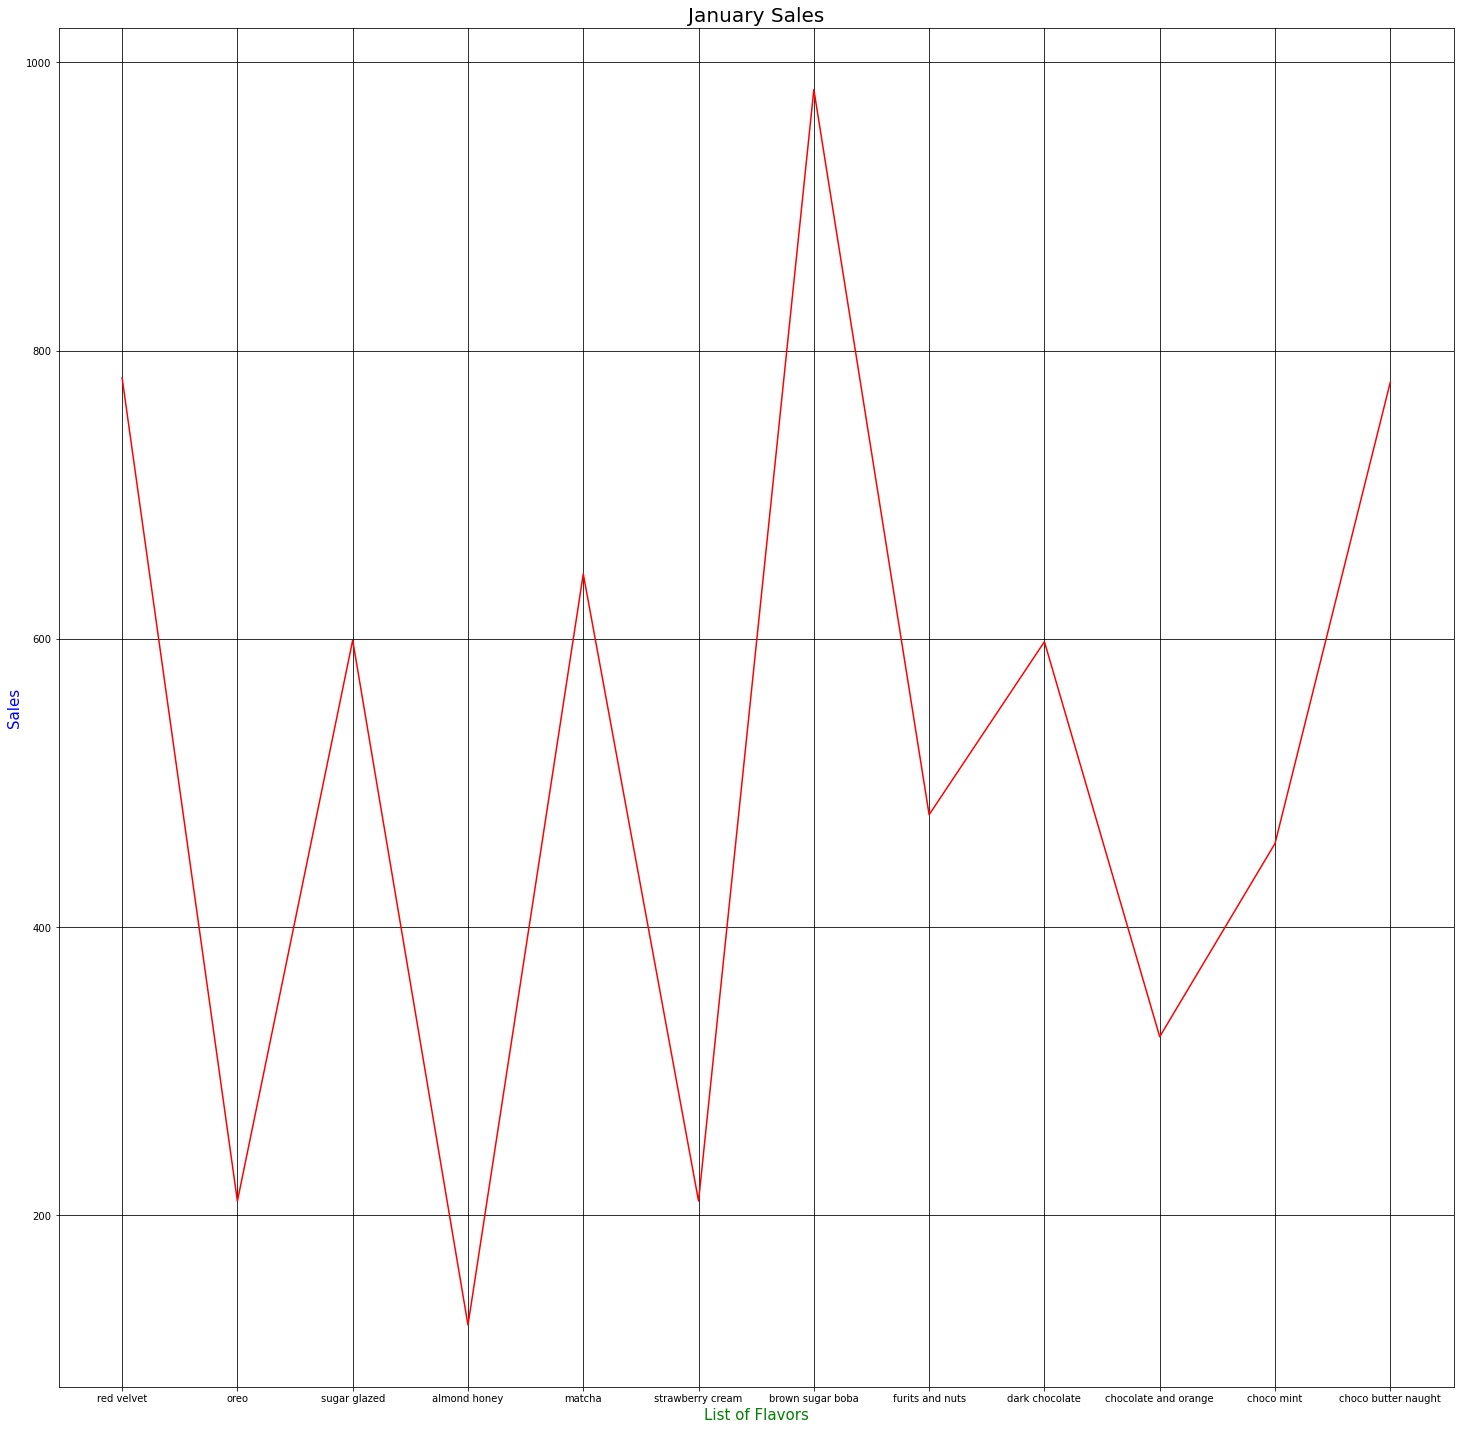

In [254]:
plt.figure(figsize=(25,25))
plt.title('January Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.january, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

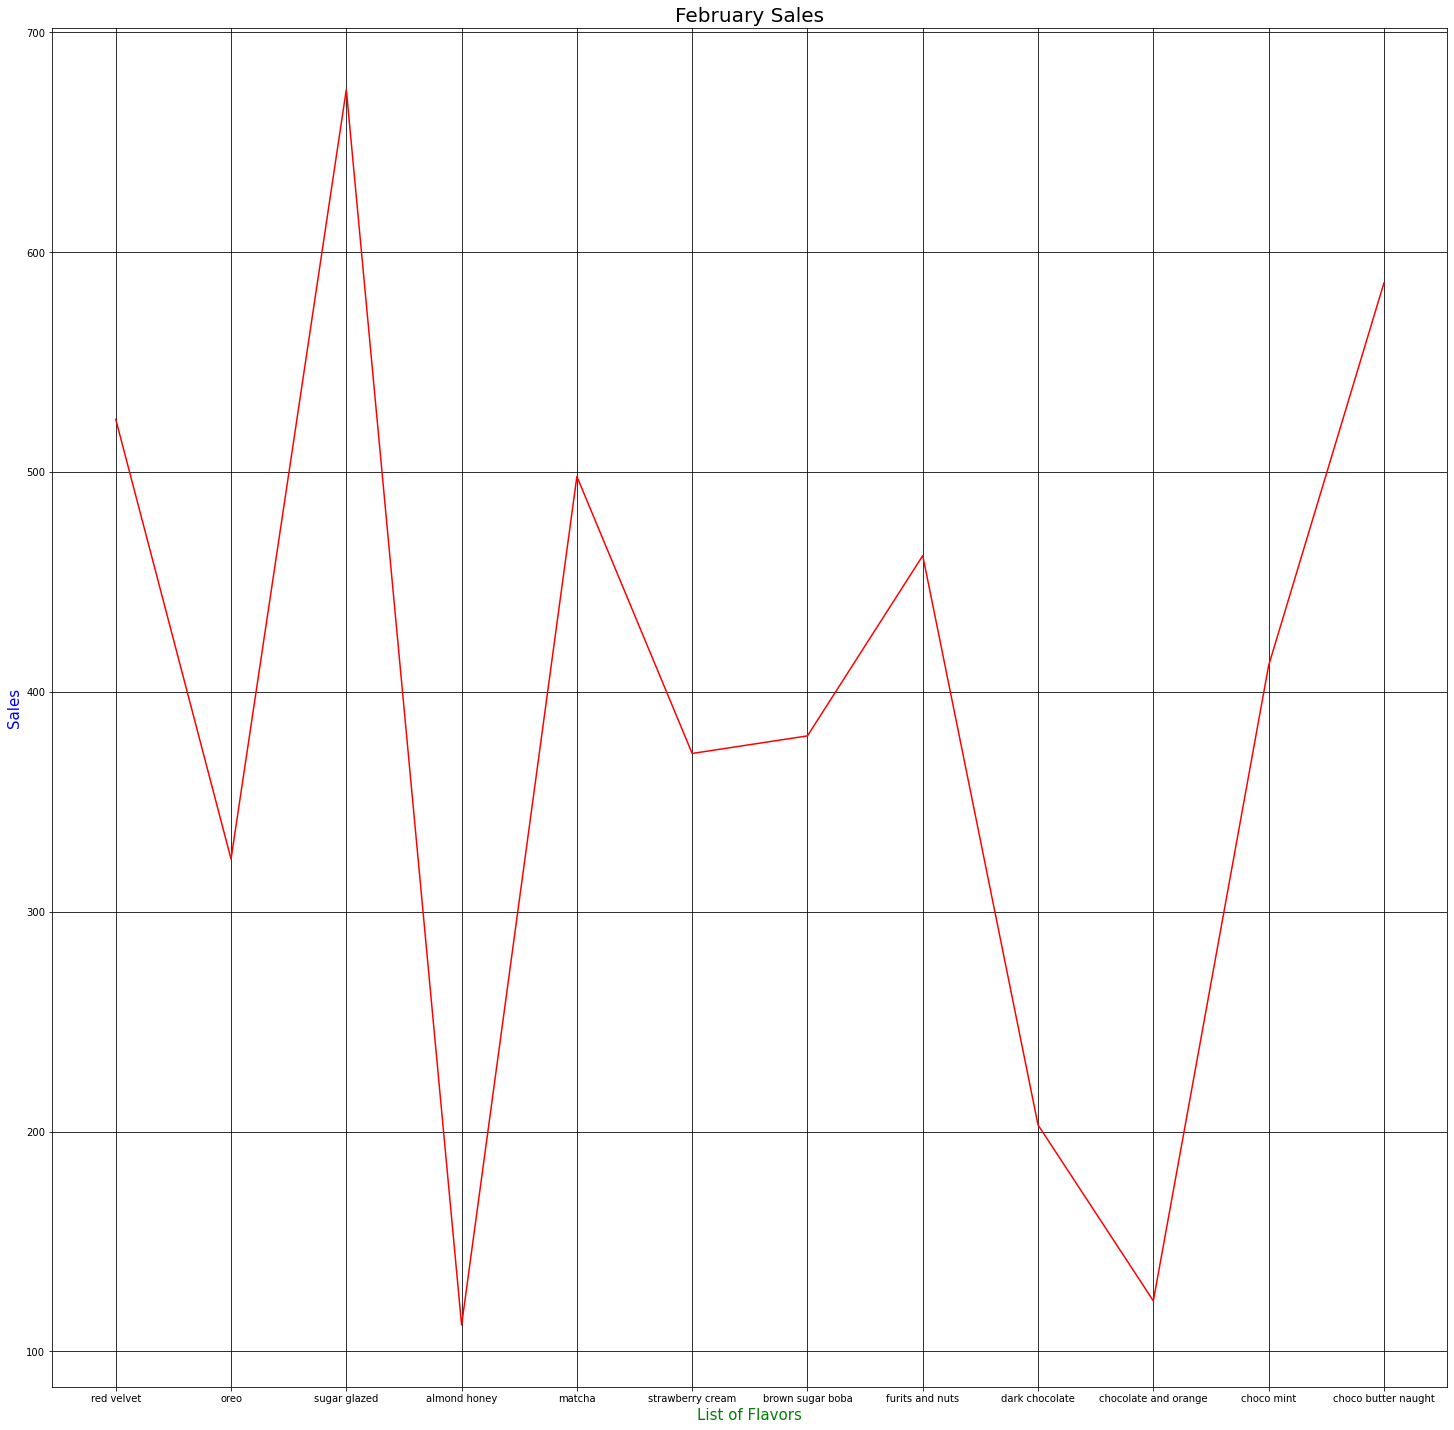

In [255]:
plt.figure(figsize=(25,25))
plt.title('February Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.february, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

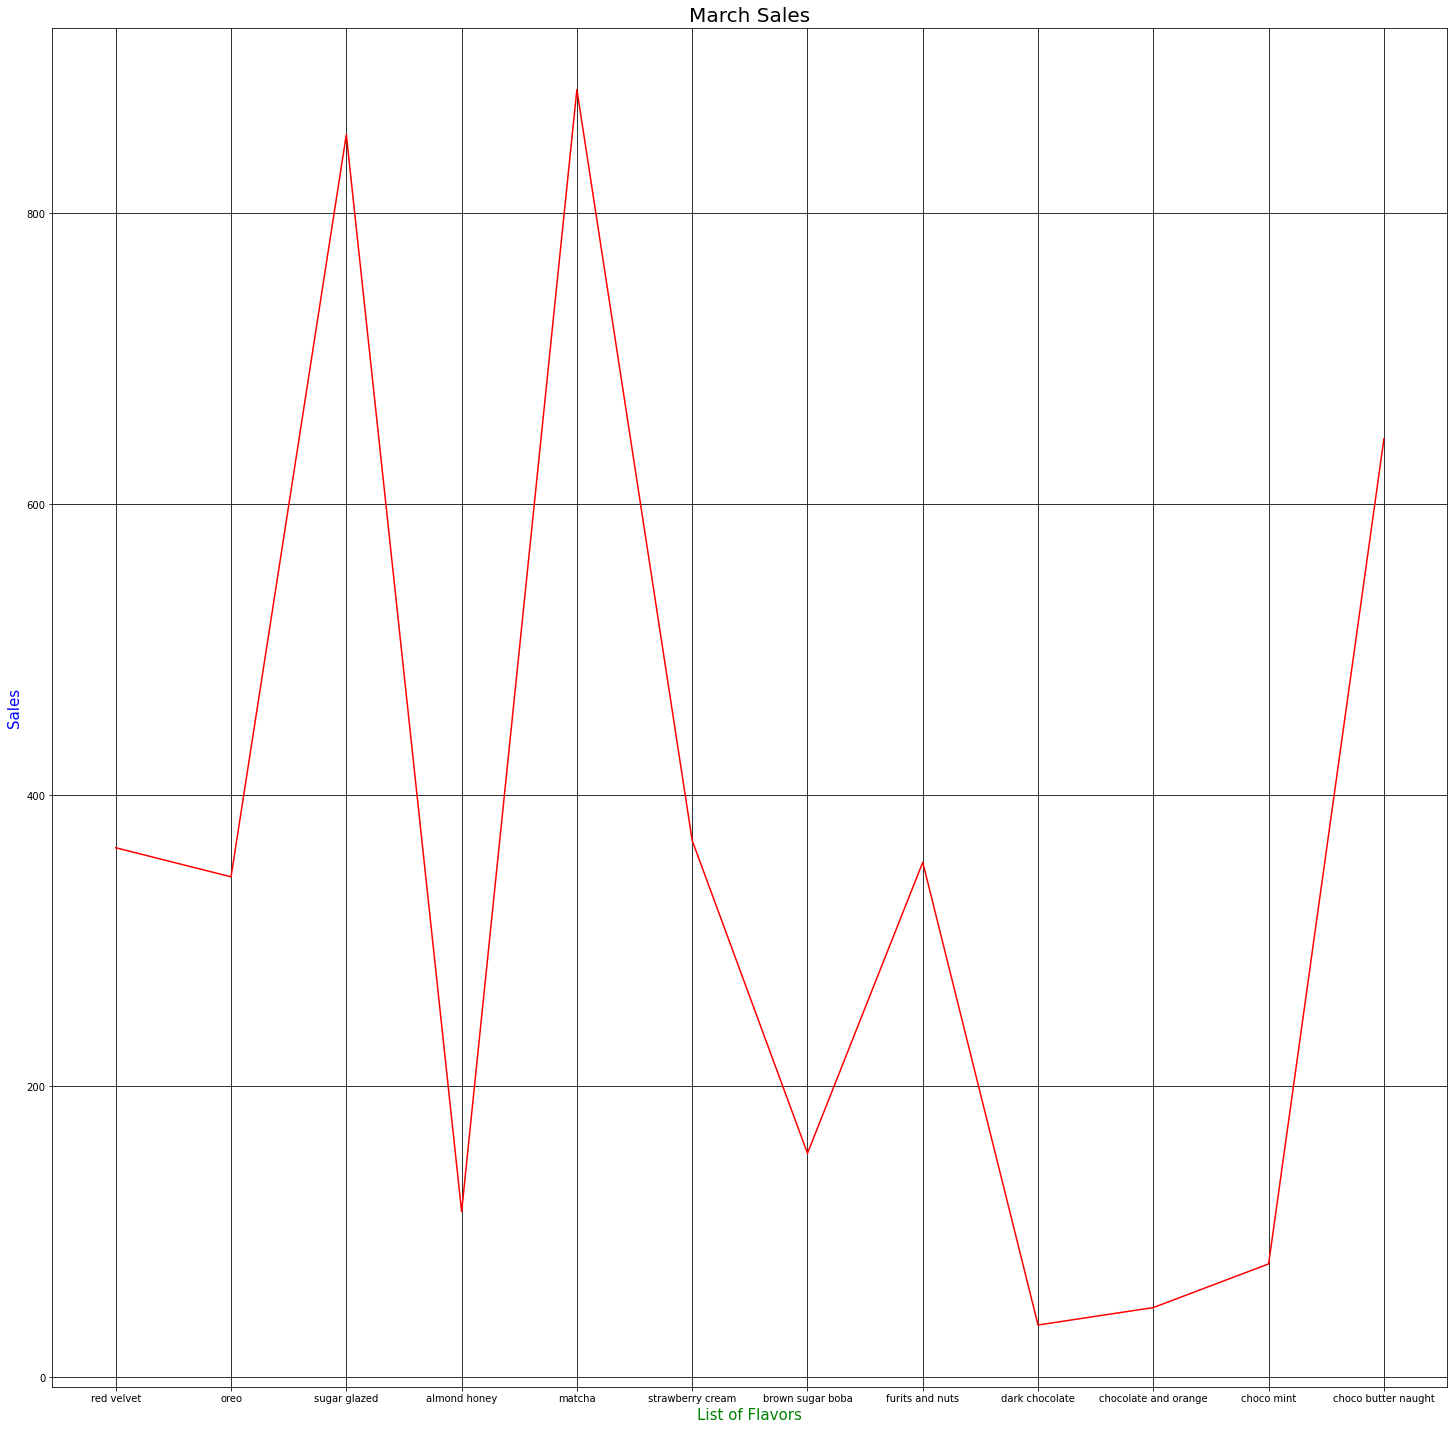

In [256]:
plt.figure(figsize=(25,25))
plt.title('March Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.march, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

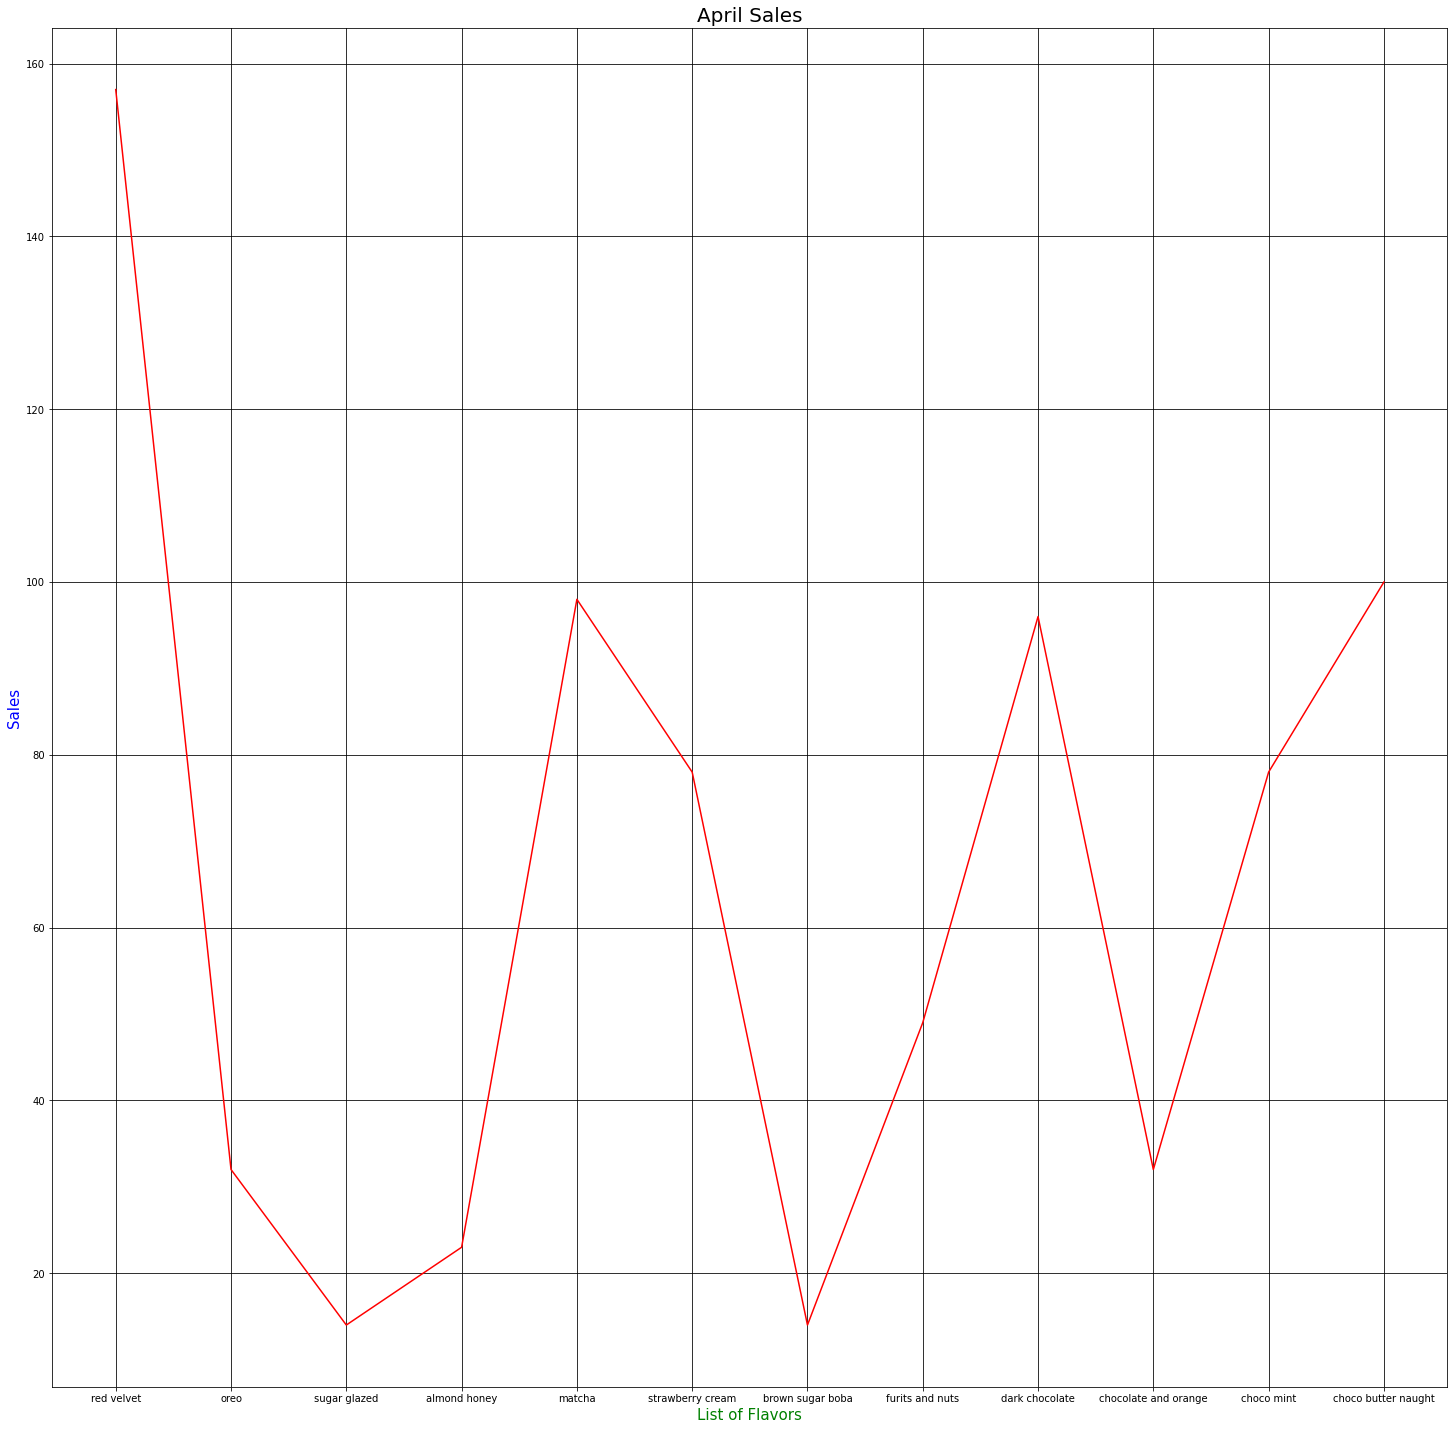

In [257]:
plt.figure(figsize=(25,25))
plt.title('April Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.april, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

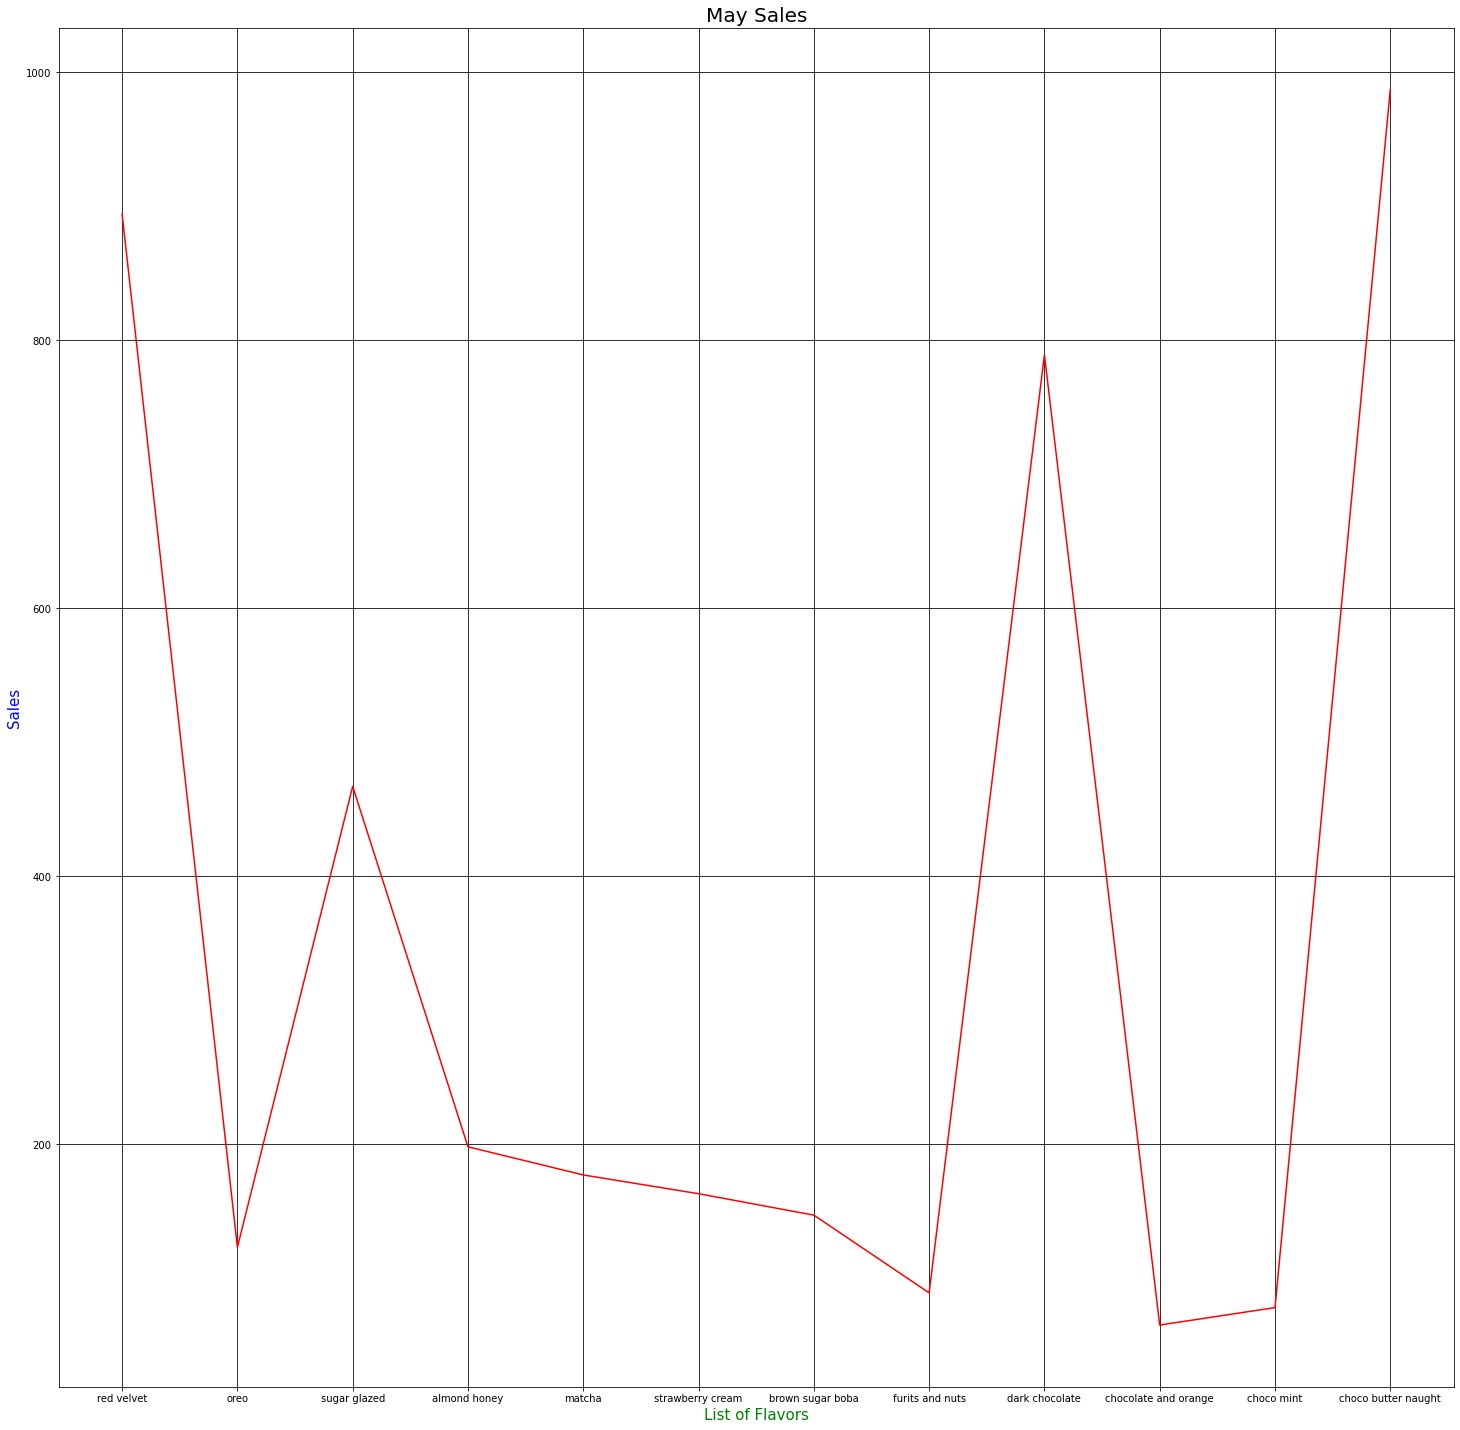

In [258]:
plt.figure(figsize=(25,25))
plt.title('May Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.may, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

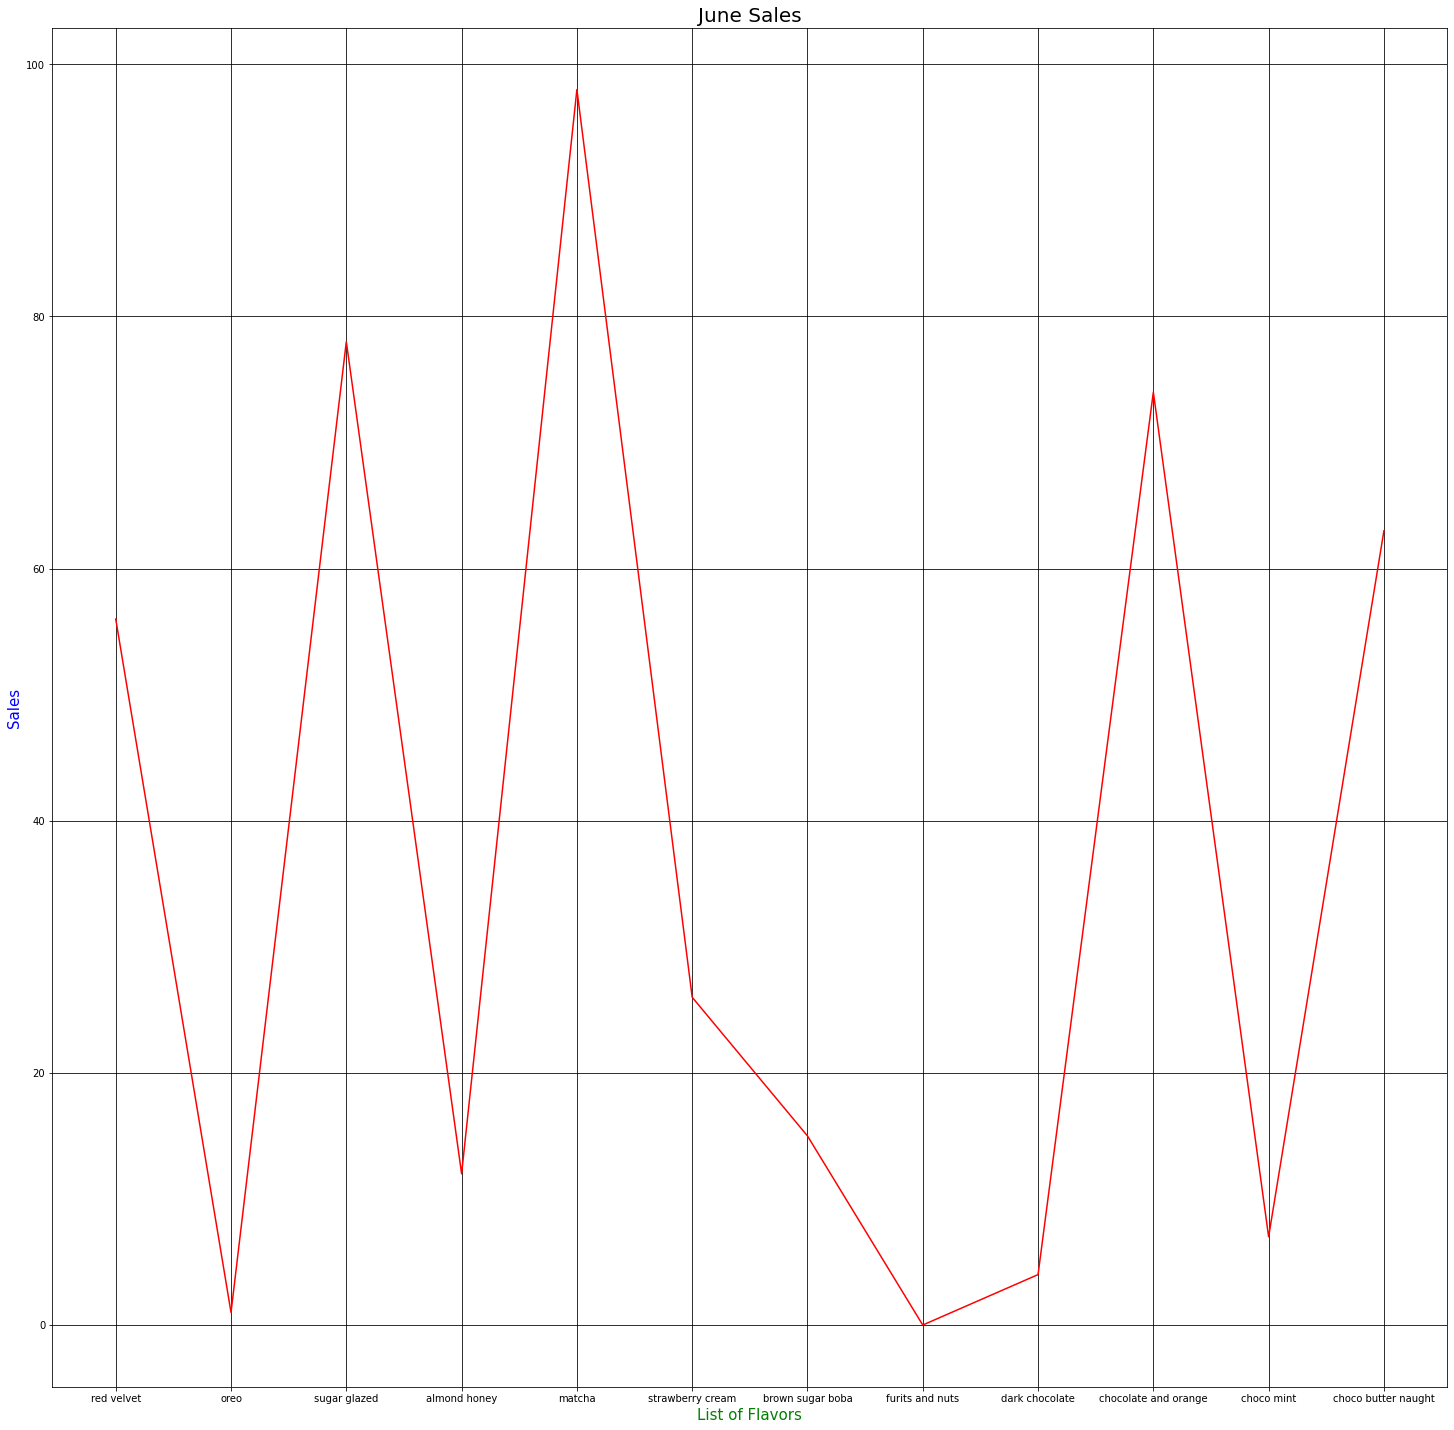

In [259]:
plt.figure(figsize=(25,25))
plt.title('June Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.june, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

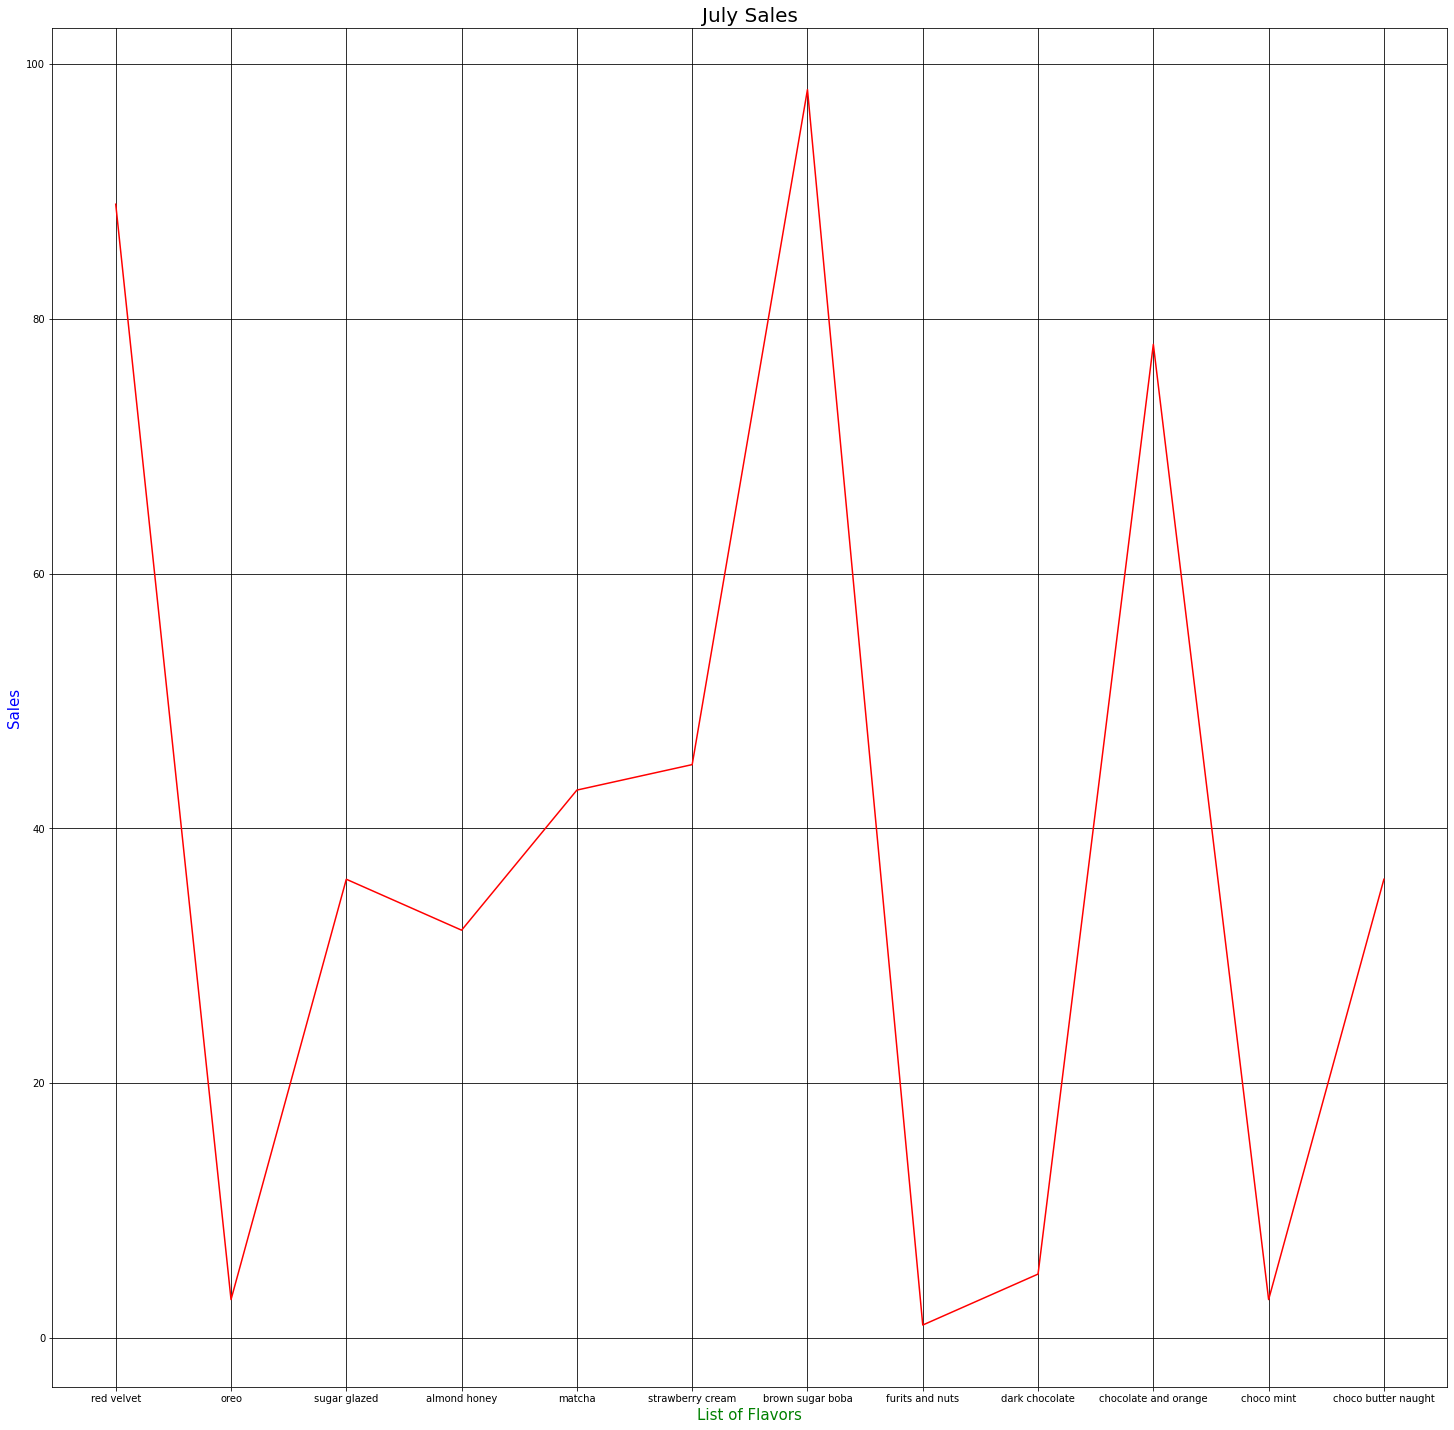

In [260]:
plt.figure(figsize=(25,25))
plt.title('July Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.july, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

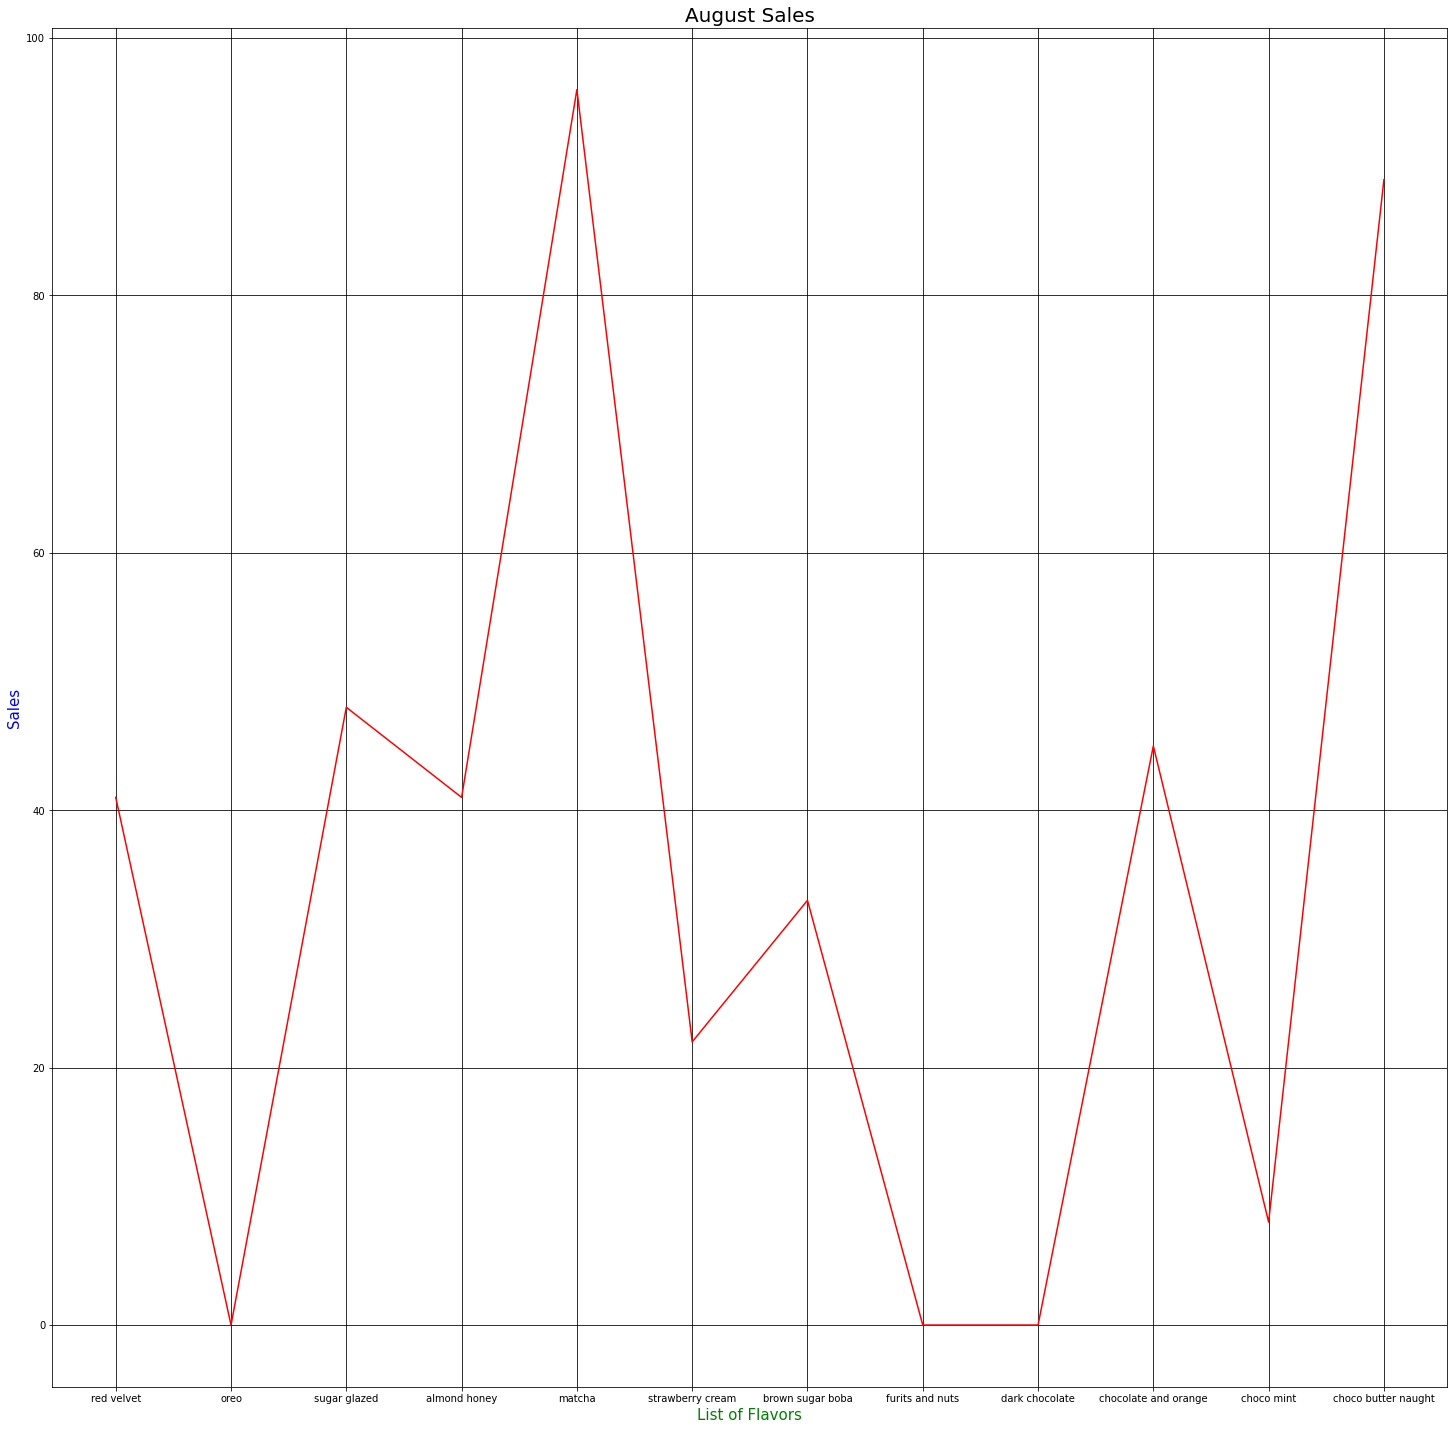

In [261]:
plt.figure(figsize=(25,25))
plt.title('August Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.august, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

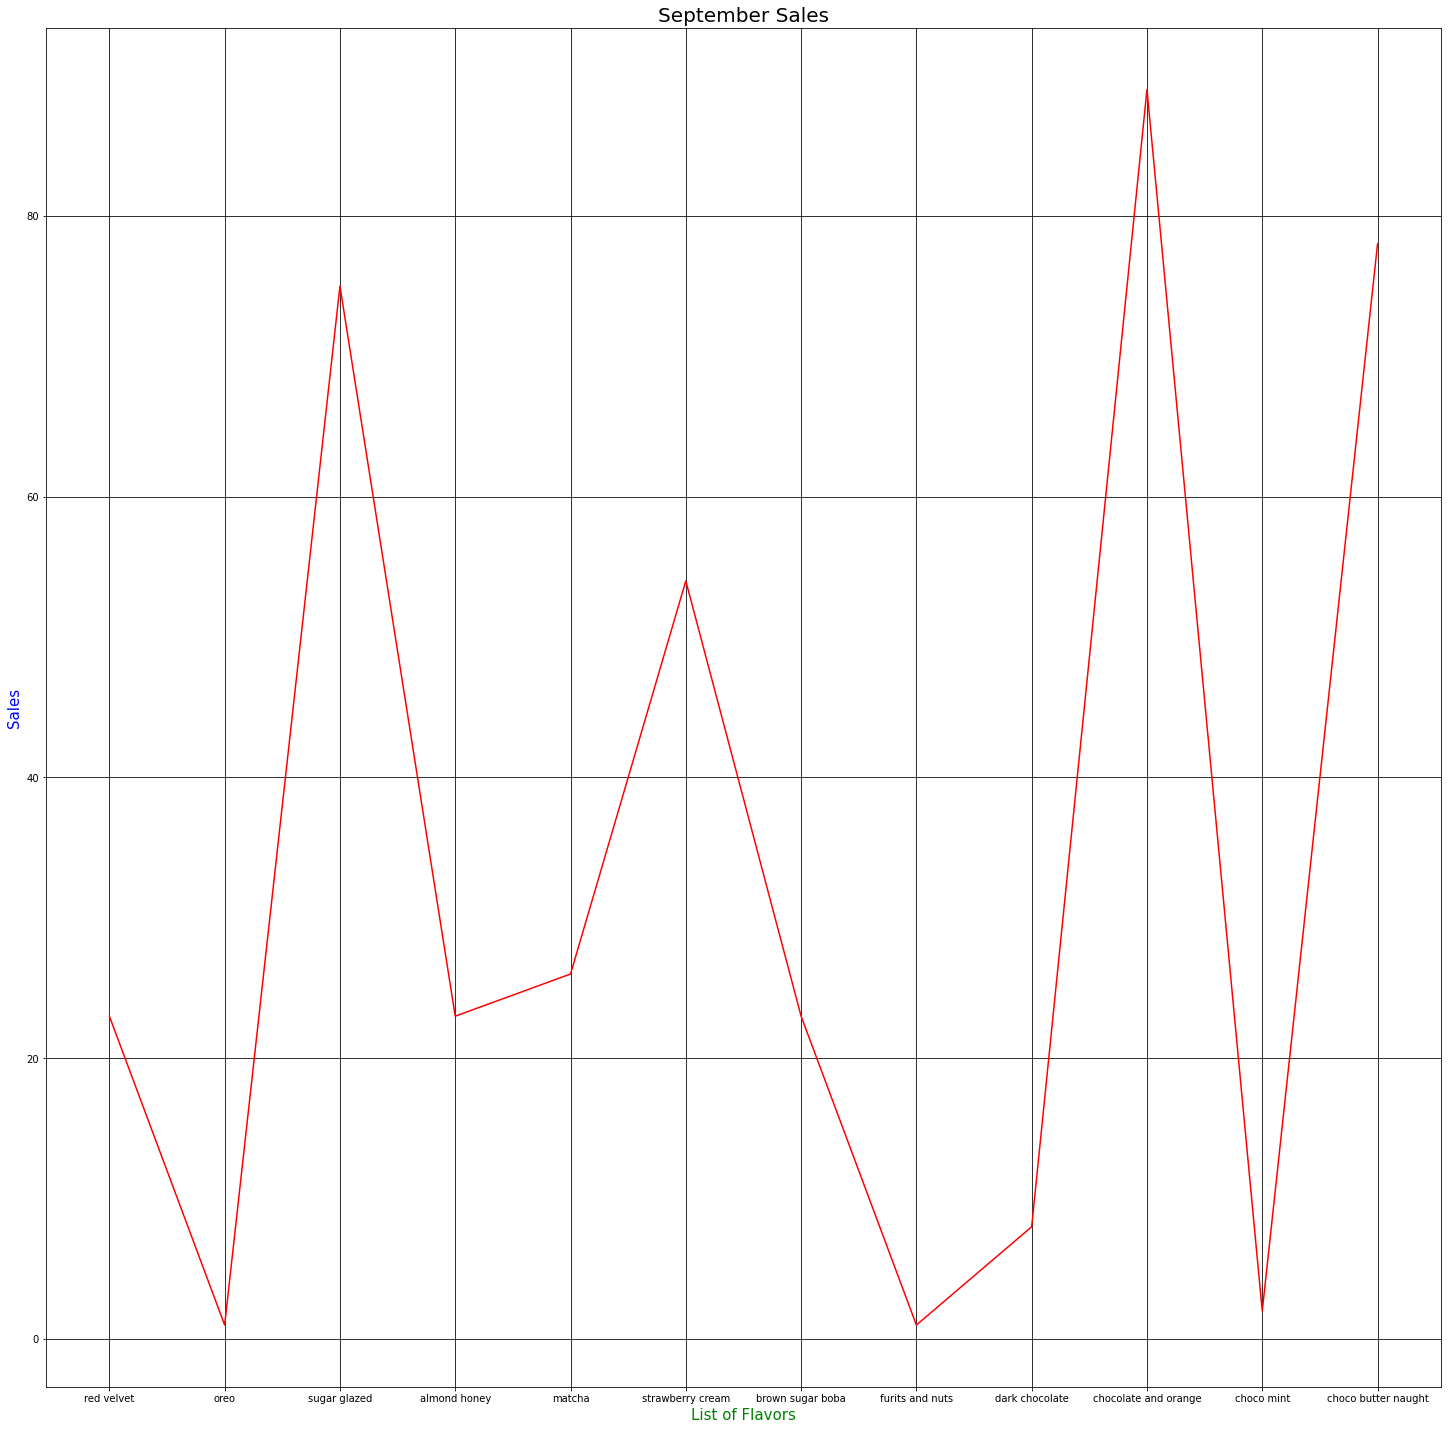

In [262]:
plt.figure(figsize=(25,25))
plt.title('September Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.september, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

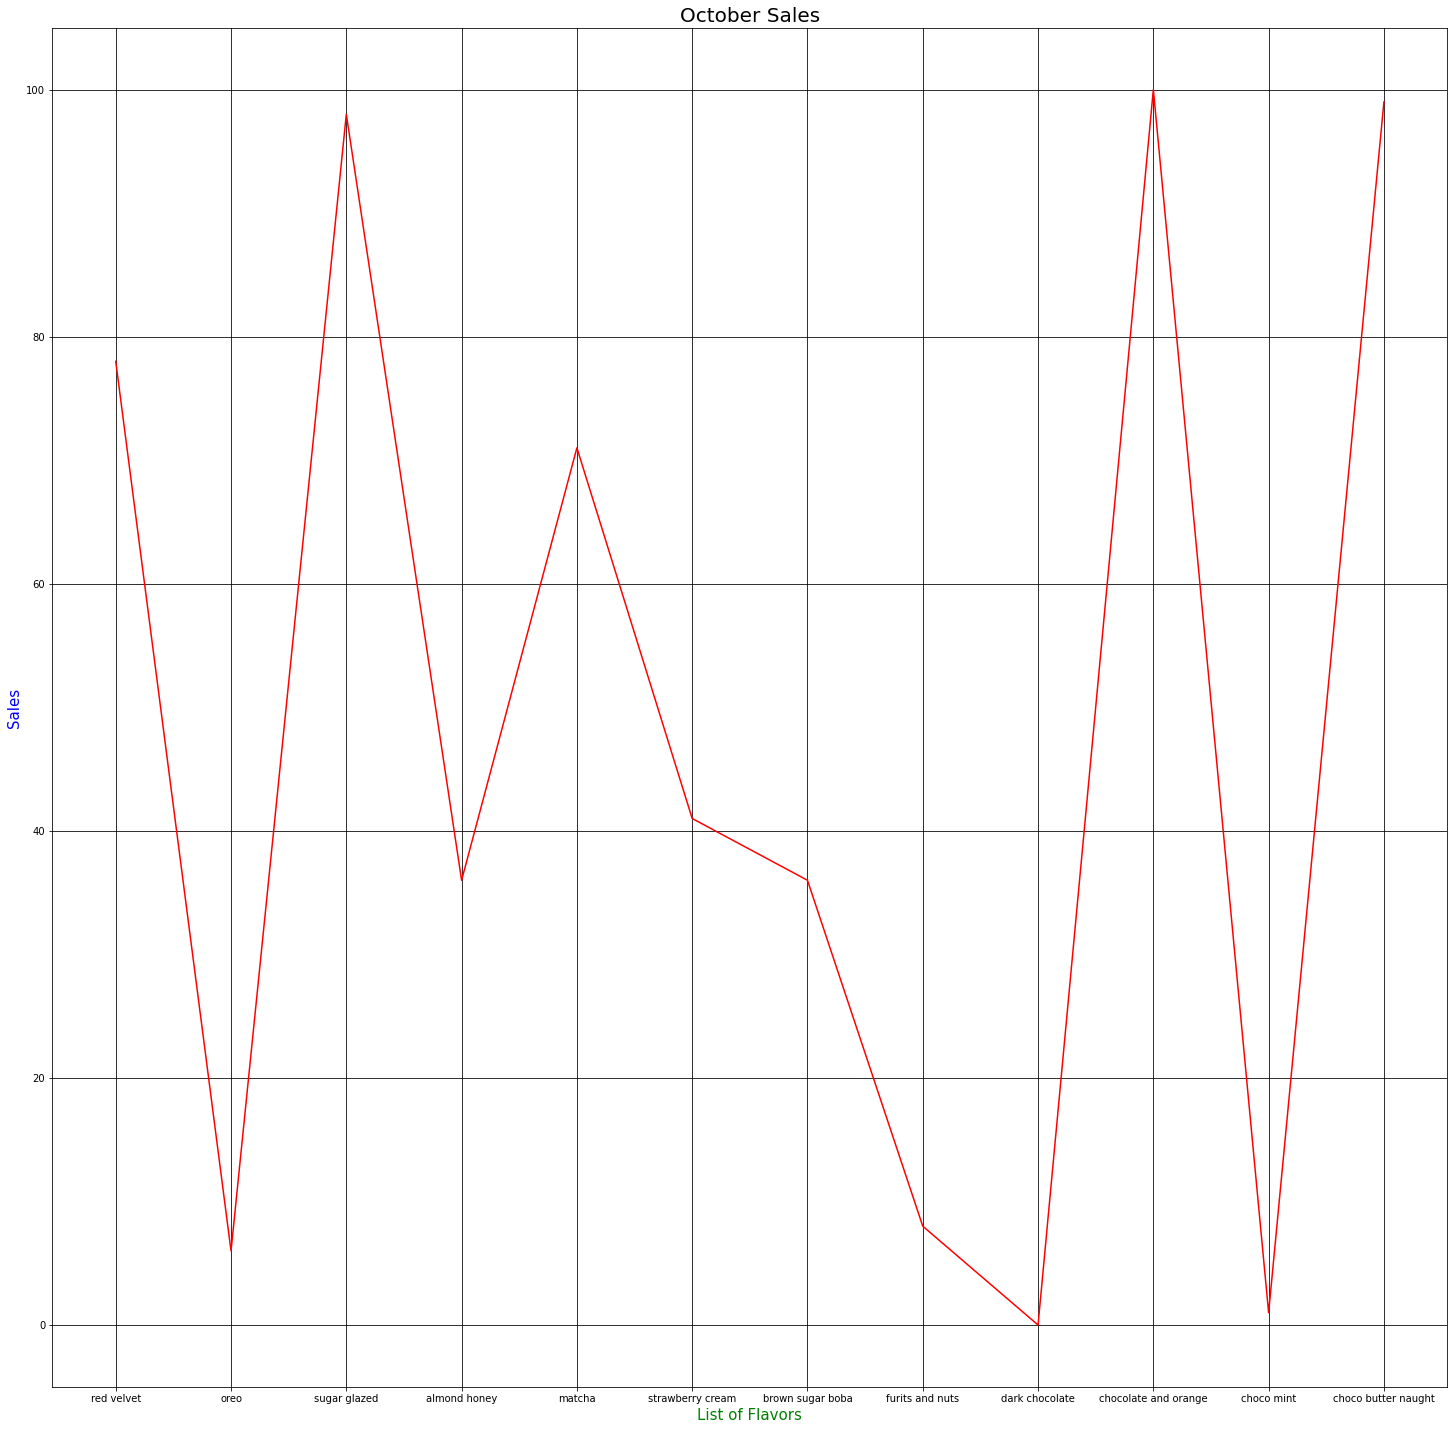

In [264]:
plt.figure(figsize=(25,25))
plt.title('October Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.october, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

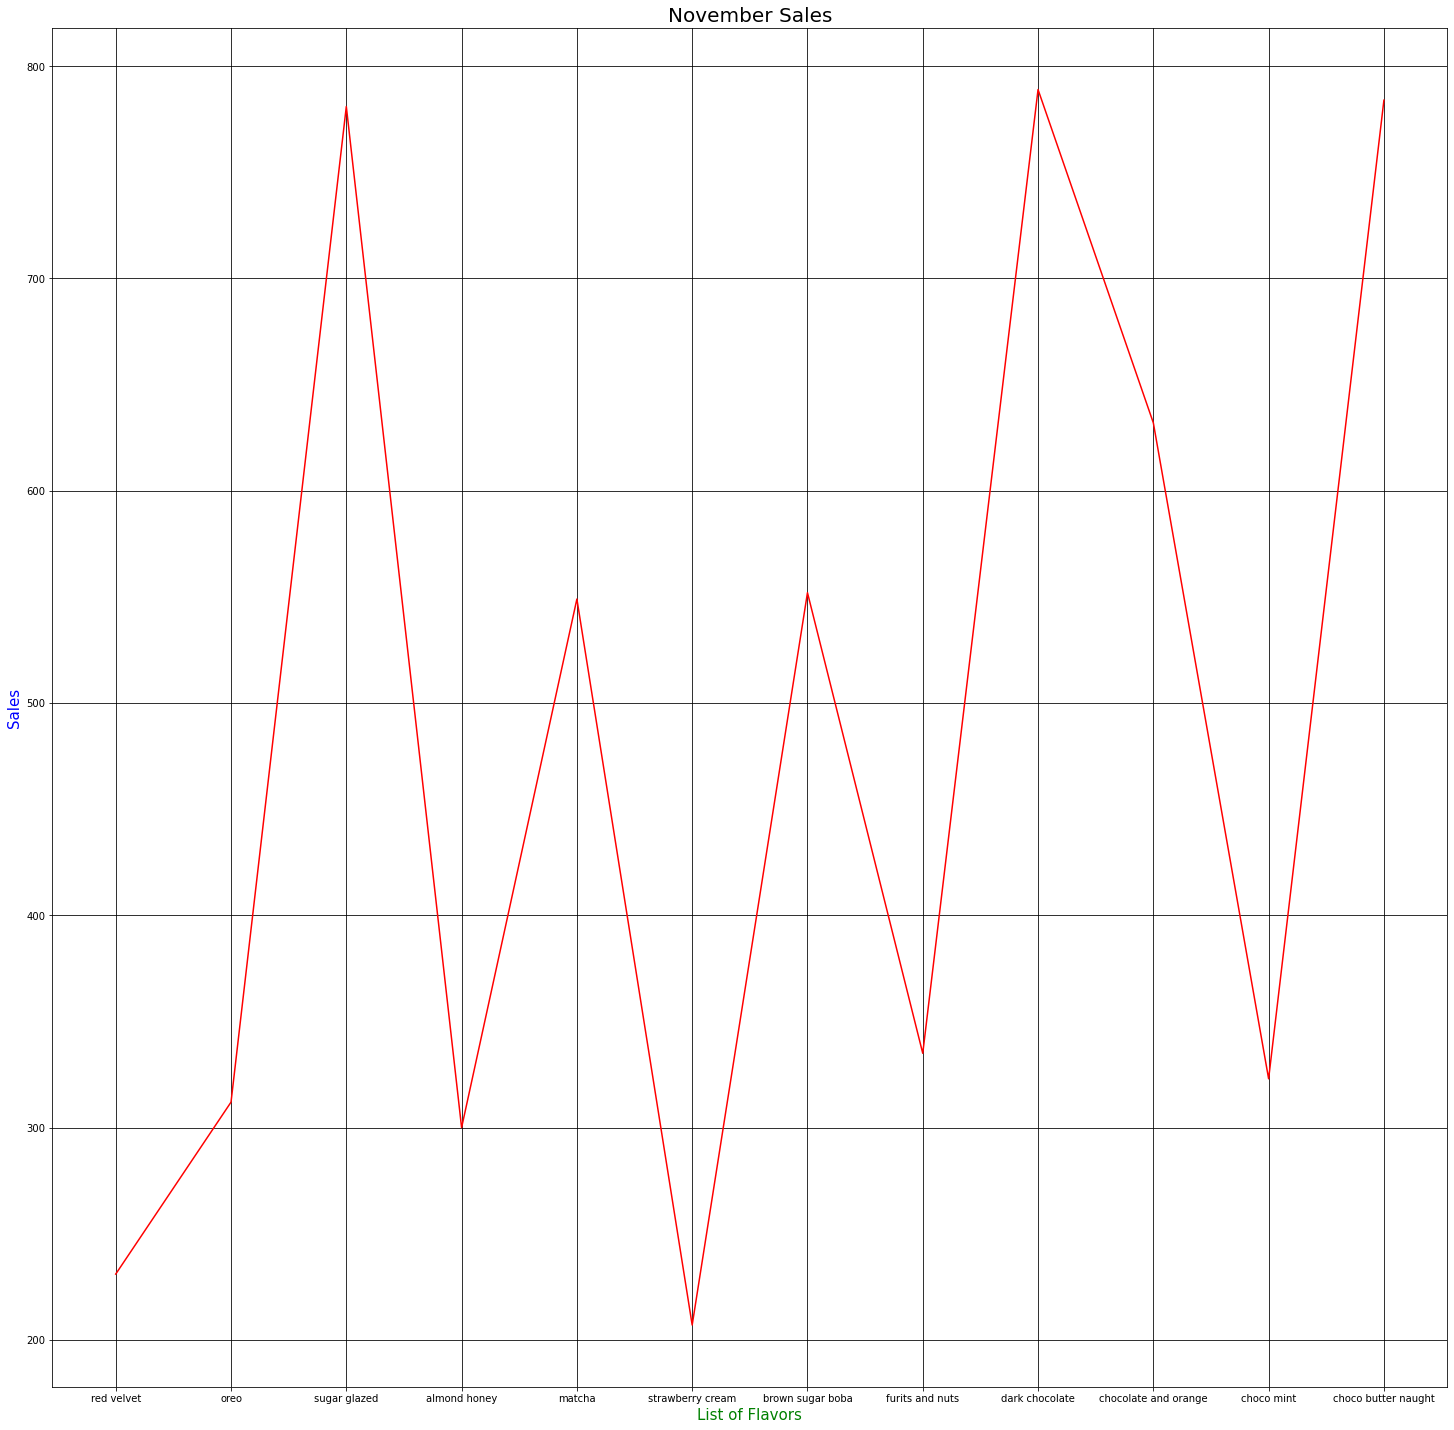

In [265]:
plt.figure(figsize=(25,25))
plt.title('November Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.november, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

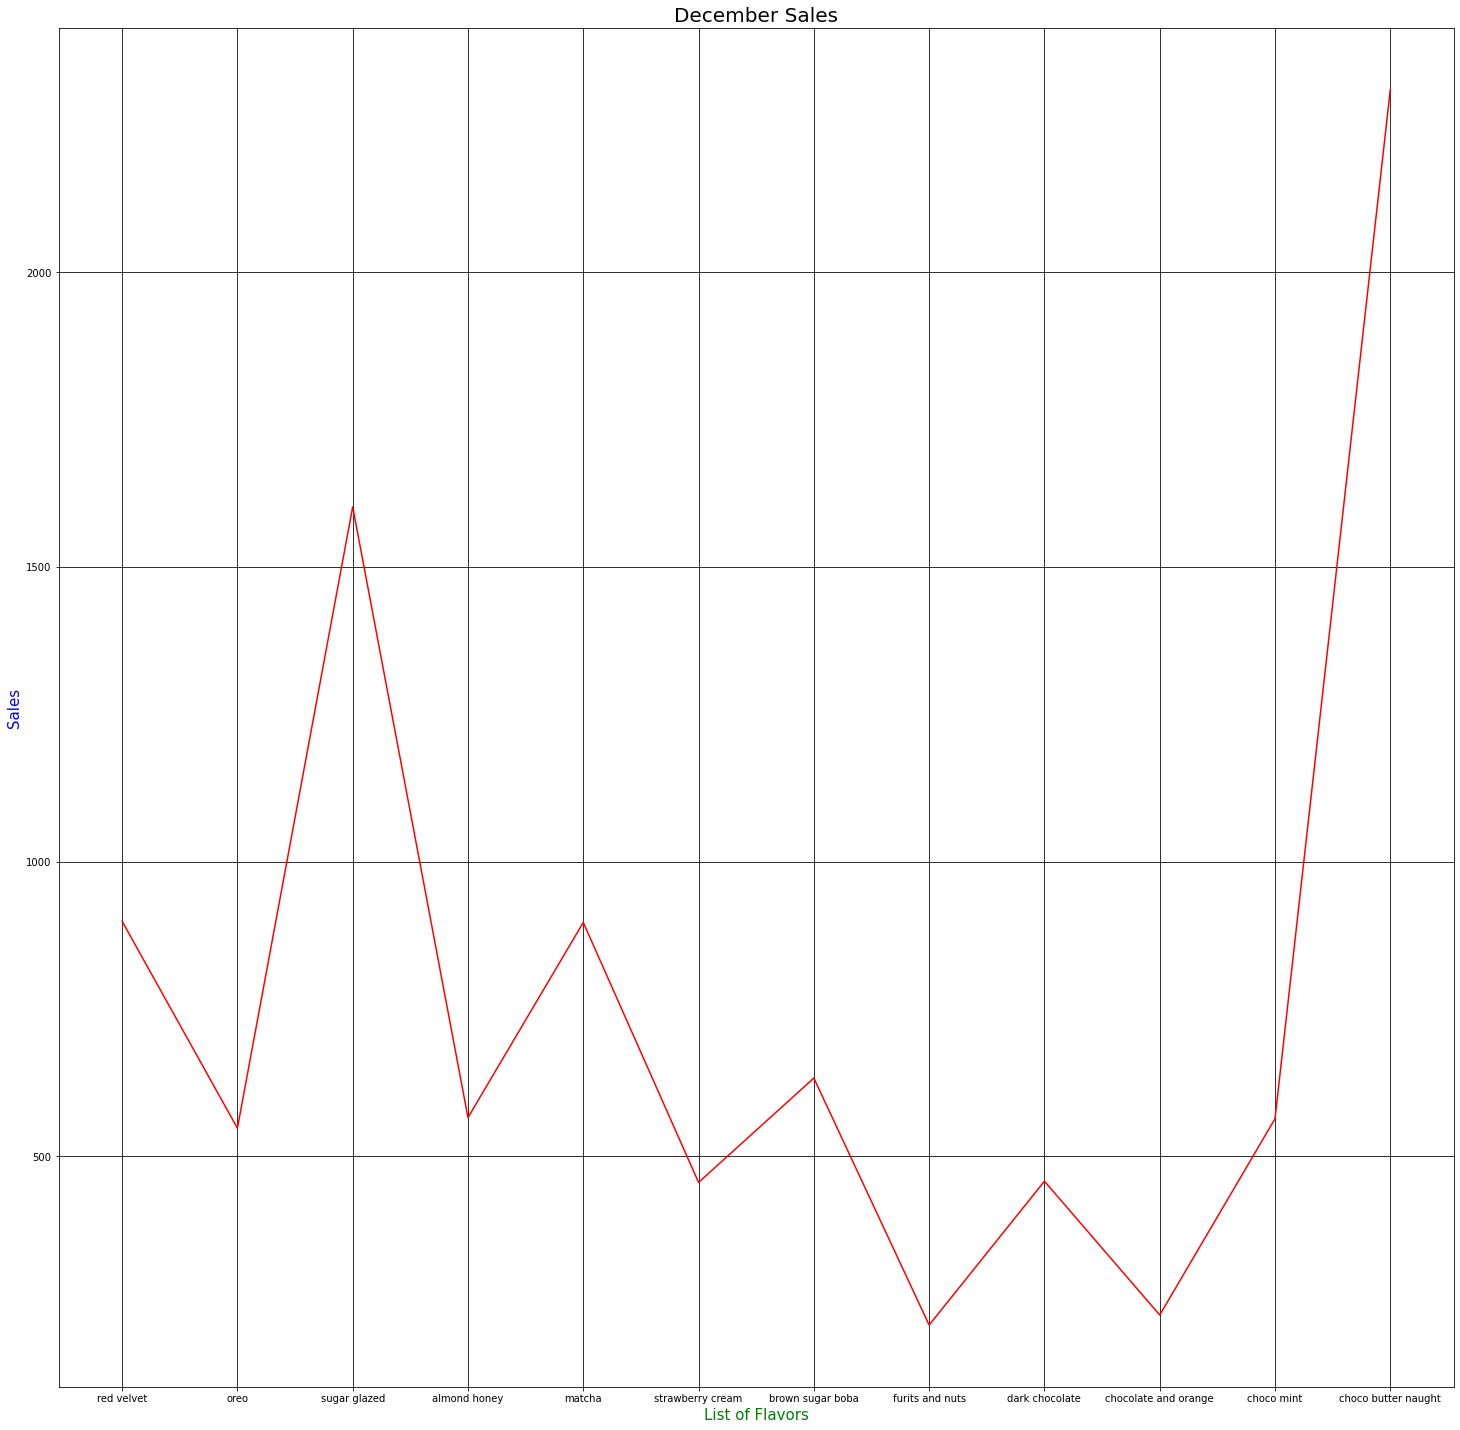

In [266]:
plt.figure(figsize=(25,25))
plt.title('December Sales', fontdict={'fontsize':20}, color= 'Black') 

plt.plot(df_sales.flavor, df_sales.december, color = 'red') 
plt.xlabel('List of Flavors', fontdict={'fontsize':15}, color='green')
plt.ylabel('Sales', fontdict={'fontsize':15},  color='blue')

plt.grid(color = 'black')
plt.show()

#### Monthly Sales

#### Flavor Sales

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

   The result from the data given of Bebang's business projects the income of different flavors within different month and its total profit gives a hint to what is popular among all and what are those lack of sales flavors. There are twelve different flavors and each of them have price and cost from raw and product which was used to compute the monthly revenue, cost and profit for monthly inspection of income. It turns out that profit each month was good but there are some instances that there are flavors that gives lower contribution to the profit than expected, the graph shows its trend of what are those who gives higher income and those who gives low and it is obvious that there are some flavors that is consistent of having a lowe income for there are lack of customers choose to buy that flavor that is why it is beneficial if some changes will be made. The recommended changes for this type of business is to have experiment with new flavors, it might costy at first but it will adopt soon if it make it to the customer's interest so it is also better if these flavors that will be added will be the replacement of those flavors that gives lower profit and would be better if these flavors have the same price as what it was replaced from so just few changes only will be made. Also, marketing strategy and advertisement is important but then again there are some markerting styles that cost a lot so it must be a wise act to use social media platforms to introduce the business. Using the social media platforms can help the business grow and be known by the people, it requires daily update also so that people will soon be interested to try the products. Feedbacks from the customers are important also such that, it might be helpful if the business will allow the customers to suggest flavors that they like and try to tally what are those flavors most people requested so that it can add up to the menu of flavors. This recommended features for the business will surely make the profit higher than expected that is Bebang must create a plan and start doing the new features for her business if she wanted to make it more popular to the world of business.